### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

# Assignment activity 2

### Prepare your workstation

In [4]:
# Import the necessary libraries.
import pandas as pd
import numpy as np

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')

# View the DataFrame.
ad

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730
...,...,...,...,...,...,...,...,...
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,11-15 Minutes,1439


In [28]:
# Determine whether there are missing values.
ad_na = ad.isna().sum()
ad_na

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

In [56]:
#Sense check the data

In [824]:
print(ad.columns)
print(ad.shape)
print(ad.dtypes)

Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')
(137793, 8)
sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object


In [834]:
# Determine the metadata of the data set.
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [38]:
# Determine the descriptive statistics of the data set.
ad.describe().round(1)

,count_of_appointments
count,137793.0
mean,1219.1
std,1546.9
min,1.0
25%,194.0
50%,696.0
75%,1621.0
max,15400.0


In [12]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [42]:
# Determine whether there are missing values.
ar_na = ar.isna().sum()
ar_na

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

In [50]:
# Sense check the data

In [52]:
print(ar.columns)
print(ar.shape)
print(ar.dtypes)

Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')
(596821, 7)
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


In [44]:
# Determine the metadata of the data set.
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [46]:
# Determine the descriptive statistics of the data set.
ar.describe().round(1)

,count_of_appointments
count,596821.0
mean,1244.6
std,5856.9
min,1.0
25%,7.0
50%,47.0
75%,308.0
max,211265.0


In [73]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

# View the DataFrame.
nc

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


In [77]:
# Determine whether there are missing values.
nc_na = nc.isna().sum()
nc_na

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

In [86]:
#Sense check the data

In [88]:
print(nc.columns)
print(nc.shape)
print(nc.dtypes)

Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')
(817394, 8)
appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


In [64]:
# Determine the metadata of the data set.
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [762]:
# Determine the descriptive statistics of the data set.
nc['count_of_appointments'].describe().round(1)

count    817394.0
mean        362.2
std        1084.6
min           1.0
25%           7.0
50%          25.0
75%         128.0
max       16590.0
Name: count_of_appointments, dtype: float64

### Explore the data set

**Question 1:** How many locations are there in the data set?

In [100]:
# Determine the number of locations.
print("Number of unique locations:", nc['sub_icb_location_name'].value_counts().count())

Number of unique locations: 106


**Question 2:** What are the five locations with the highest number of appointments?



In [780]:
# Determine the top five locations based on record count.
print("Top 5 locations by appointment count:")
location = nc['sub_icb_location_name'].value_counts()
location.head(5)

Top 5 locations by appointment count:


sub_icb_location_name
NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: count, dtype: int64

**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [116]:
# Determine the number of service settings.
print("Number of service settings:", nc['service_setting'].value_counts().count())

Number of service settings: 5


In [118]:
# Determine the number of context types.
print("Number of context types:", nc['context_type'].value_counts().count())

Number of context types: 3


In [120]:
# Determine the number of national categories.
print("Number of national categories:", nc['national_category'].value_counts().count())


Number of national categories: 18


In [122]:
# Determine the number of appointment statuses.
print("Number of appointment statuses:", ar['appointment_status'].value_counts().count())

Number of appointment statuses: 3


# 

# Assignment activity 3

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [846]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad['appointment_date'].head()

0    2021-12-01
1    2021-12-01
2    2021-12-01
3    2021-12-01
4    2021-12-01
Name: appointment_date, dtype: object

In [820]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc['appointment_date'].head(5)

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [848]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# View the DateFrame.
ad.appointment_date.head()

0   2021-12-01
1   2021-12-01
2   2021-12-01
3   2021-12-01
4   2021-12-01
Name: appointment_date, dtype: datetime64[ns]

In [136]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.
print('The first appointment was the ', ad['appointment_date'].dt.date.min())

print('The last appointment was the ', ad['appointment_date'].dt.date.max())

The first appointment was the  2021-12-01
The last appointment was the  2022-06-30


In [138]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.
print('The first appointment was the ', nc['appointment_date'].dt.date.min())

print('The last appointment was the ', nc['appointment_date'].dt.date.max())

The first appointment was the  2021-08-01
The last appointment was the  2022-06-30


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [874]:
# For each of these service settings, determine the number of records available for the period and the location (filtering relevant information). 
nc_data_subset = nc.loc[(nc['sub_icb_location_name']=='NHS North West London ICB - W2U3Z') &
                   (nc['appointment_date'].between('2022-01-01','2022-06-01', inclusive='both'))]

# View the output.
nc_data_subset


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
800289,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,496,2022-01
800290,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Primary Care Network,Care Related Encounter,Clinical Triage,19,2022-01
800291,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Other,Inconsistent Mapping,Inconsistent Mapping,1,2022-01
800292,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Inconsistent Mapping,Inconsistent Mapping,16,2022-01
800293,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Primary Care Network,Care Related Encounter,Planned Clinics,29,2022-01
...,...,...,...,...,...,...,...,...
806220,2022-06-01,E54000027,NHS North West London ICB - W2U3Z,Extended Access Provision,Care Related Encounter,Home Visit,4,2022-06
806221,2022-06-01,E54000027,NHS North West London ICB - W2U3Z,Extended Access Provision,Care Related Encounter,General Consultation Routine,27,2022-06
806222,2022-06-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,Unplanned Clinical Activity,626,2022-06
806223,2022-06-01,E54000027,NHS North West London ICB - W2U3Z,Extended Access Provision,Care Related Encounter,General Consultation Acute,224,2022-06


In [ ]:
# Calculating the number of unique service settings

In [882]:
nc_data_subset['service_setting'].value_counts()

service_setting
General Practice             2104
Other                        1318
Primary Care Network         1272
Extended Access Provision    1090
Unmapped                      152
Name: count, dtype: int64

In [884]:
# Calculating the total number of appointments per ss to answer the question raised

In [896]:
appointments_per_setting = nc_data_subset.groupby('service_setting')['count_of_appointments'].sum().sort_values(ascending=False)
print(appointments_per_setting)

service_setting
General Practice             4804239
Unmapped                      391106
Other                         152897
Primary Care Network          109840
Extended Access Provision      98159
Name: count_of_appointments, dtype: int64


**Question 3:** Which month had the highest number of appointments?

In [212]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.
nc.groupby(
    [nc['appointment_date'].dt.year, nc['appointment_date'].dt.month]
)['count_of_appointments'].sum().sort_values(ascending=False)


appointment_date  appointment_date
2021              11                  30405070
                  10                  30303834
2022              3                   29595038
2021              9                   28522501
2022              5                   27495508
                  6                   25828078
                  1                   25635474
                  2                   25355260
2021              12                  25140776
2022              4                   23913060
2021              8                   23852171
Name: count_of_appointments, dtype: int64

**Question 4:** What was the total number of records per month?

In [900]:
# Total number of records per month.
total_month = nc.groupby('appointment_month').size()
total_month.sort_values(ascending=False)

appointment_month
2022-03    82822
2021-11    77652
2022-05    77425
2021-09    74922
2022-06    74168
2021-10    74078
2021-12    72651
2022-01    71896
2022-02    71769
2022-04    70012
2021-08    69999
dtype: int64

# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [266]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [289]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc['appointment_month'] = nc['appointment_month'].astype(str)
print(nc.dtypes)
print(nc.shape)

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object
(817394, 8)


In [285]:
# Aggregate on monthly level and determine the sum of records per month.
nc_css = nc.groupby('appointment_month')
nc_css =nc_css.size().reset_index(name='count_of_appointments')
# View output.
appointment_size.sort_values ('count_of_appointments', ascending = False)

,appointment_month,count_of_appointments
7,2022-03,82822
3,2021-11,77652
9,2022-05,77425
1,2021-09,74922
10,2022-06,74168
2,2021-10,74078
4,2021-12,72651
5,2022-01,71896
6,2022-02,71769
8,2022-04,70012


**Service settings:**

In [1006]:
# Create a DataFrame with specified columns.
nc_ss = nc[['appointment_month', 'service_setting', 'count_of_appointments']]

nc_ss

,appointment_month,service_setting,count_of_appointments
0,2021-08,Primary Care Network,3
1,2021-08,Other,7
2,2021-08,General Practice,79
3,2021-08,General Practice,725
4,2021-08,General Practice,2
...,...,...,...
817389,2022-06,Extended Access Provision,12
817390,2022-06,Extended Access Provision,4
817391,2022-06,Extended Access Provision,92
817392,2022-06,Extended Access Provision,4


In [1008]:
# View monthly appointments by service setting. 
nc_ss = nc_ss.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

nc_ss.head()

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


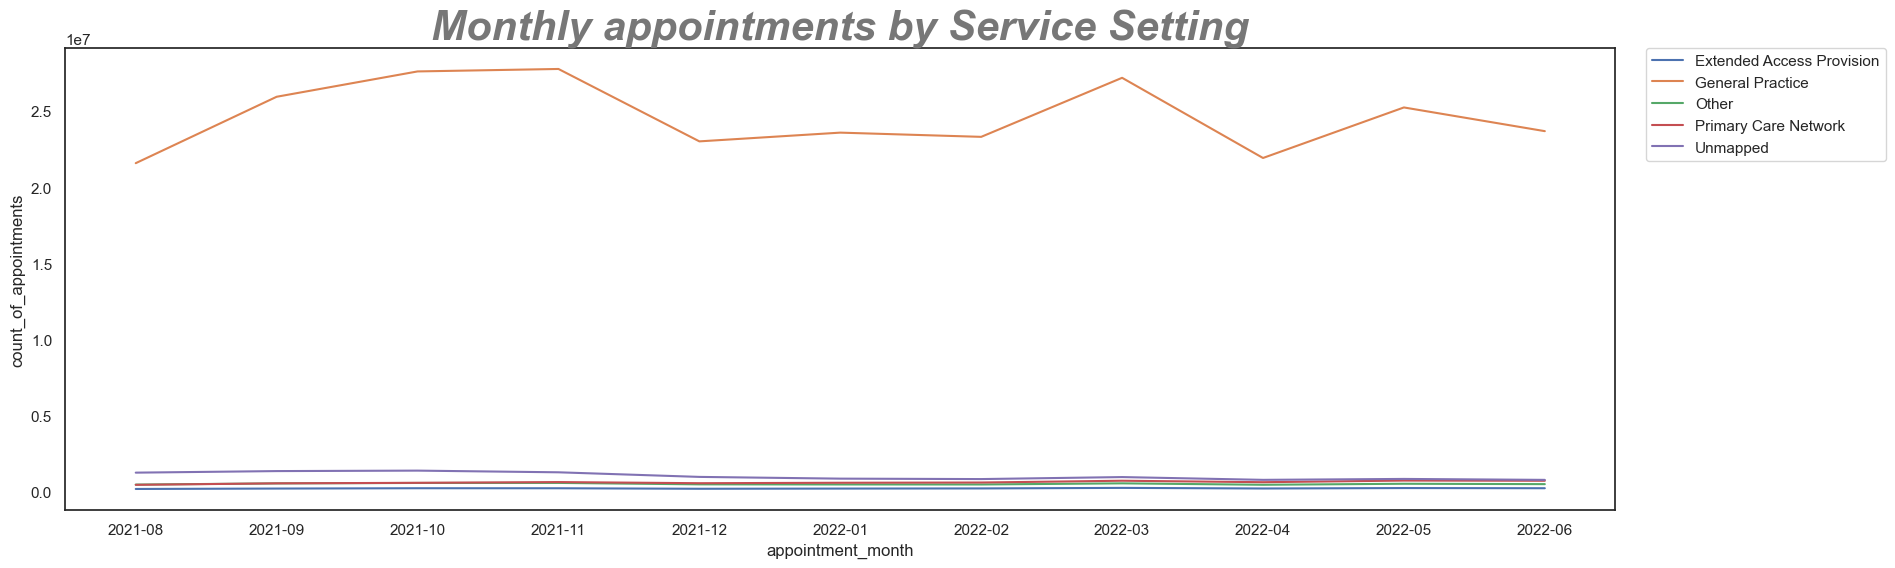

In [1427]:
# Plot the appointments over the available date range, and review the service settings for months.
sns.lineplot(data = nc_ss, x="appointment_month", y="count_of_appointments", hue = "service_setting").set_title("Monthly appointments by Service Setting", fontsize=30,fontweight='bold', fontstyle='oblique', color='#777777')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
;

#Save the chart as an image
plt.savefig('monthly_appointments1.png')

**Context types:**

In [1010]:
# Create a separate data set that can be used in future weeks. 
nc_ct = nc[['appointment_month', 'context_type', 'count_of_appointments']]
nc_ct


,appointment_month,context_type,count_of_appointments
0,2021-08,Care Related Encounter,3
1,2021-08,Care Related Encounter,7
2,2021-08,Care Related Encounter,79
3,2021-08,Care Related Encounter,725
4,2021-08,Care Related Encounter,2
...,...,...,...
817389,2022-06,Care Related Encounter,12
817390,2022-06,Care Related Encounter,4
817391,2022-06,Care Related Encounter,92
817392,2022-06,Care Related Encounter,4


In [1012]:
# Plot the appointments over the available date range, and review the context types for months.
nc_ct = nc_ct.groupby(['appointment_month', 'context_type'])['count_of_appointments'].sum().reset_index()

nc_ct

,appointment_month,context_type,count_of_appointments
0,2021-08,Care Related Encounter,20255235
1,2021-08,Inconsistent Mapping,2363093
2,2021-08,Unmapped,1233843
3,2021-09,Care Related Encounter,24404251
4,2021-09,Inconsistent Mapping,2782135
5,2021-09,Unmapped,1336115
6,2021-10,Care Related Encounter,26125201
7,2021-10,Inconsistent Mapping,2811977
8,2021-10,Unmapped,1366656
9,2021-11,Care Related Encounter,26282778


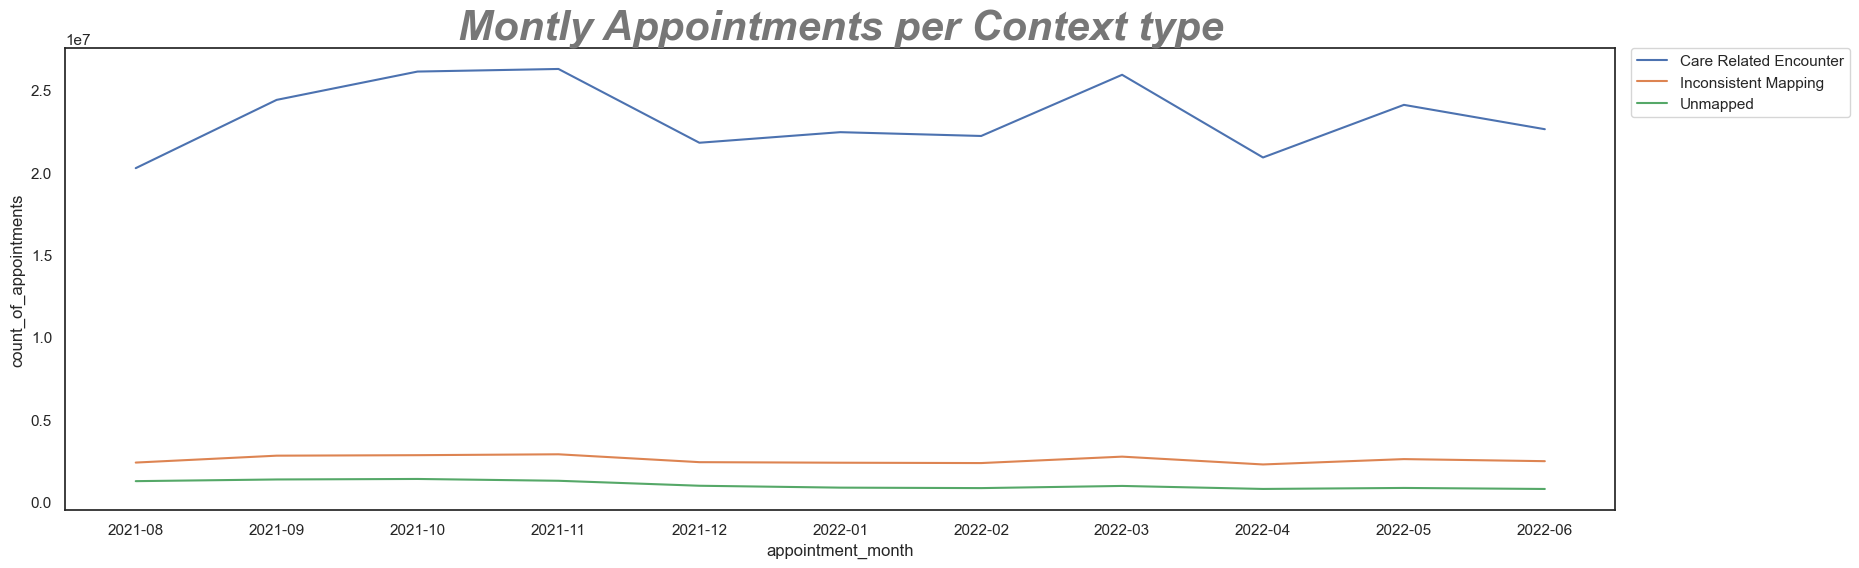

In [1429]:
# Create a lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='context_type', data=nc_ct, ci=None).set_title("Montly Appointments per Context type", fontsize=30,fontweight='bold', fontstyle='oblique', color='#777777')

plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
;
#Save the chart as an image
plt.savefig('monthly_appointments2.png')

**National categories:**

In [1016]:
# Create a separate data set that can be used in future weeks for nc. 
nc_nc = nc[['appointment_month', 'national_category', 'count_of_appointments']]

# View output.
nc_nc

,appointment_month,national_category,count_of_appointments
0,2021-08,Patient contact during Care Home Round,3
1,2021-08,Planned Clinics,7
2,2021-08,Home Visit,79
3,2021-08,General Consultation Acute,725
4,2021-08,Structured Medication Review,2
...,...,...,...
817389,2022-06,Unplanned Clinical Activity,12
817390,2022-06,Planned Clinics,4
817391,2022-06,Planned Clinical Procedure,92
817392,2022-06,General Consultation Routine,4


In [1485]:
# Plot the appointments over the available date range, and review the national categories for months.
nc_nc = nc_nc.groupby(['national_category'])['count_of_appointments'].sum().reset_index()

nc_nc_sort = nc_nc.sort_values('count_of_appointments', ascending = False)
nc_nc_sort

,national_category,count_of_appointments
4,General Consultation Routine,97271522
3,General Consultation Acute,53691150
2,Clinical Triage,41546964
11,Planned Clinics,28019748
7,Inconsistent Mapping,27890802
10,Planned Clinical Procedure,25702694
15,Unmapped,11080810
16,Unplanned Clinical Activity,3055794
6,Home Visit,2144452
14,Structured Medication Review,1858379


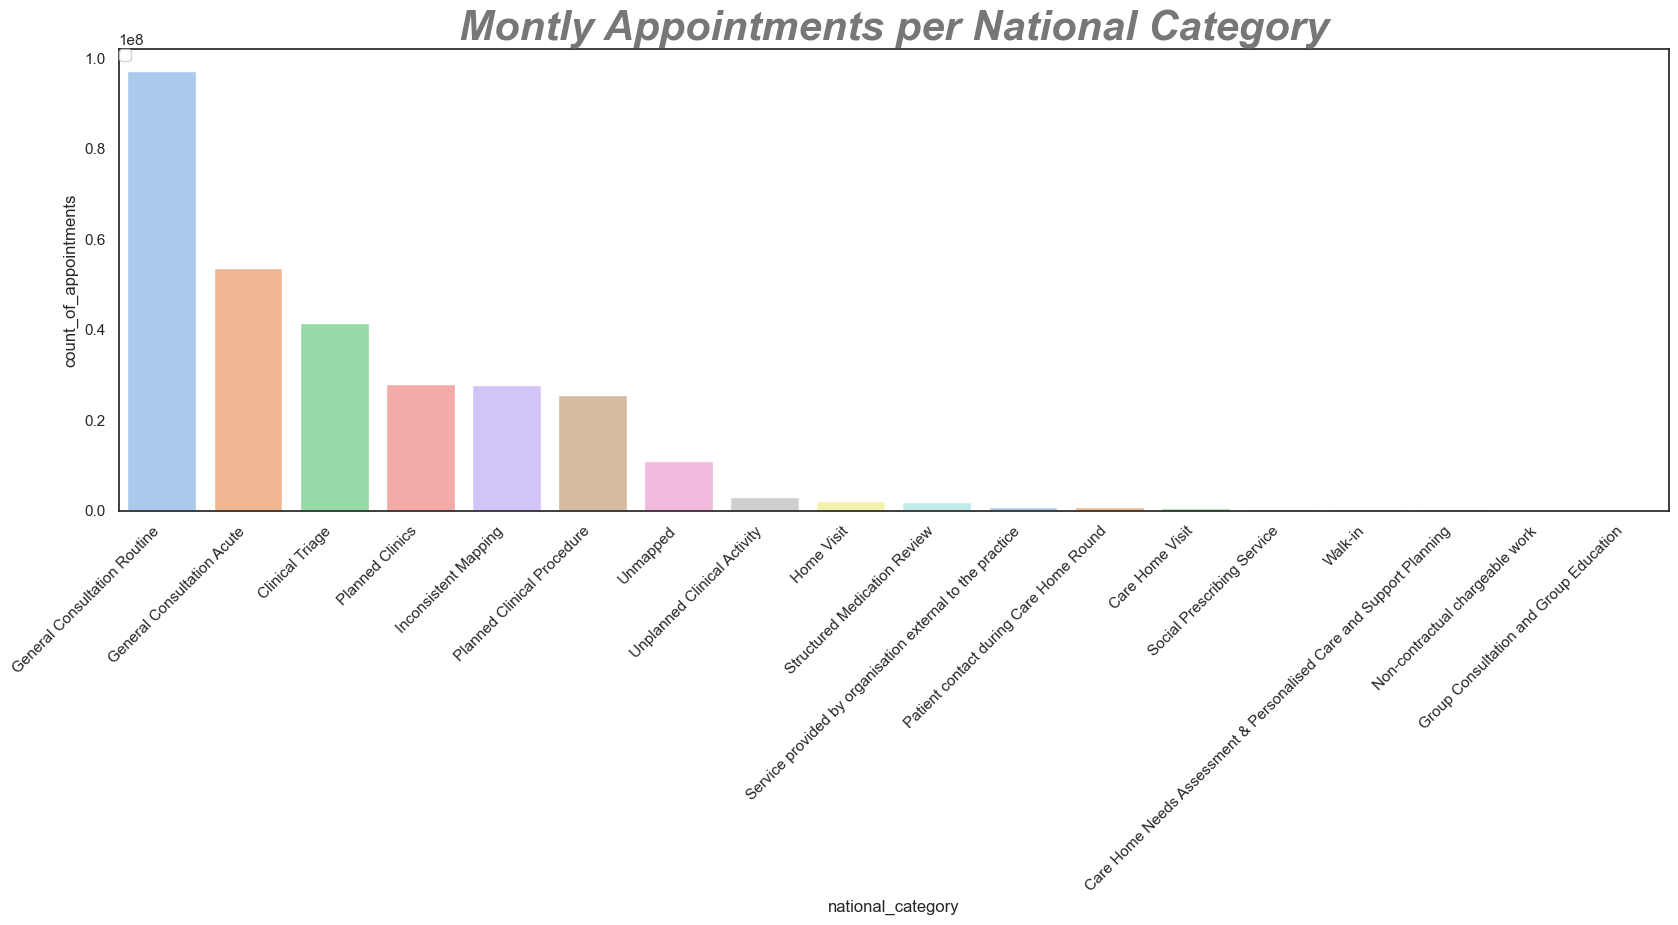

In [1536]:
# Create a barplot.
sns.barplot(x='national_category', y='count_of_appointments', hue='national_category', data=nc_nc_sort, palette="pastel", estimator = sum)

plt.title("Montly Appointments per National Category", fontsize=30,fontweight='bold', fontstyle='oblique', color='#777777')

plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=45, ha='right')
;
#Save the chart as an image
plt.savefig('monthly_appointments3.png')

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (June to August 2021), autumn (September to November 2021), winter (December to February 2022), and spring (March to May 2022).

**Summer (June to August 2021):**

In [1135]:
# Create a separate data set that can be used in future weeks. 
nc_sum = nc[nc['appointment_date'].between('2021-08-01','2021-08-31')]

nc_sum = nc_sum.groupby(['appointment_date', 'service_setting'])['count_of_appointments'].sum().reset_index()

# View output.
nc_sum


,appointment_date,service_setting,count_of_appointments
0,2021-08-01,Extended Access Provision,438
1,2021-08-01,General Practice,3411
2,2021-08-01,Other,401
3,2021-08-01,Primary Care Network,323
4,2021-08-01,Unmapped,1054
...,...,...,...
150,2021-08-31,Extended Access Provision,8281
151,2021-08-31,General Practice,1125584
152,2021-08-31,Other,23181
153,2021-08-31,Primary Care Network,21789


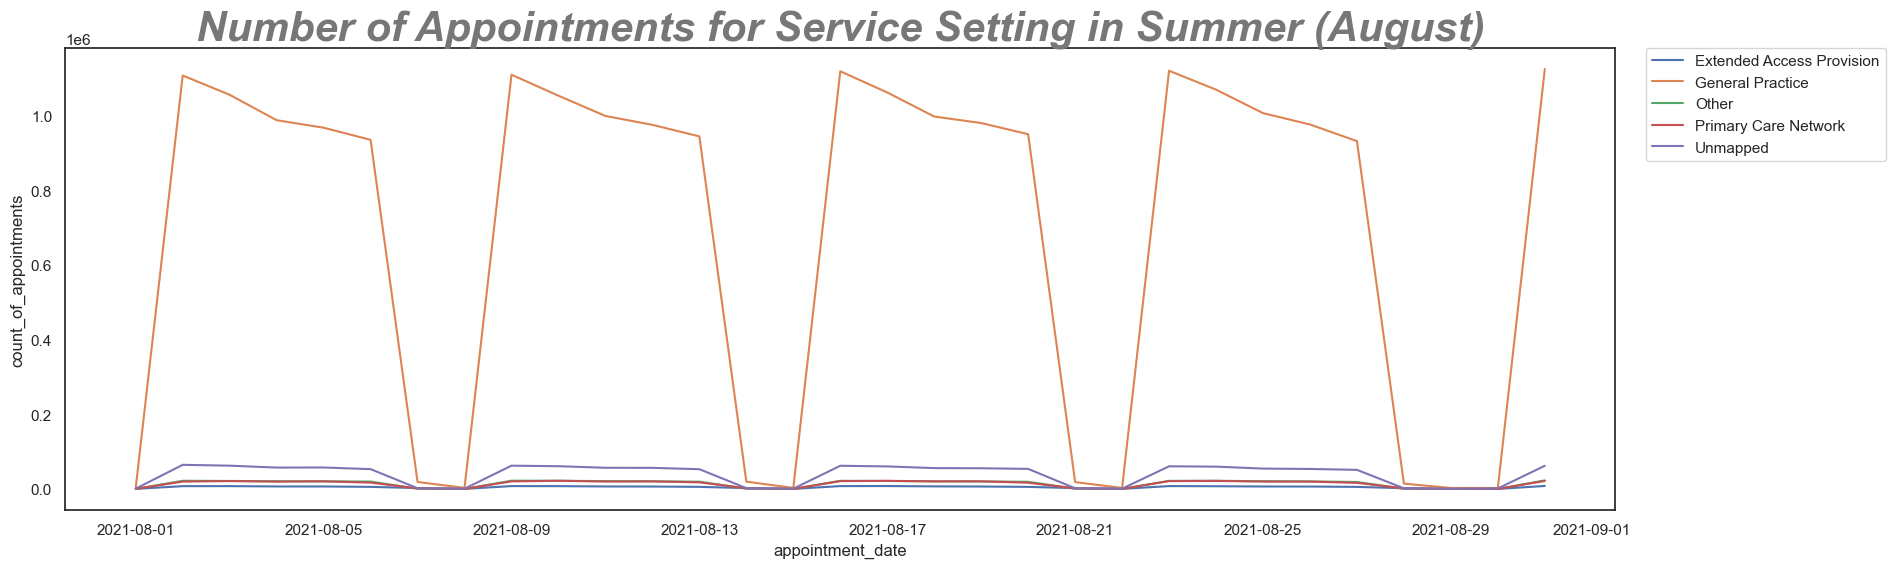

In [1433]:
# Look at June to August 2021 in more detail to allow a closer look.
# Create a lineplot.
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data=nc_sum, ci=None)

plt.title("Number of Appointments for Service Setting in Summer (August)", fontsize=30,fontweight='bold', fontstyle='oblique', color='#777777')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

#Save the chart as an image
plt.savefig('monthly_appointments4.png')

**Autumn (September to November 2021):**

In [1141]:
# Look at September to November 2021 in more detail to allow a closer look.
nc_aut = nc[nc['appointment_date'].between('2021-11-01','2021-11-30')]

nc_aut = nc_aut.groupby(['appointment_date', 'service_setting'])['count_of_appointments'].sum().reset_index()

# View output.
nc_aut


,appointment_date,service_setting,count_of_appointments
0,2021-11-01,Extended Access Provision,9405
1,2021-11-01,General Practice,1327886
2,2021-11-01,Other,25726
3,2021-11-01,Primary Care Network,26350
4,2021-11-01,Unmapped,60709
...,...,...,...
145,2021-11-30,Extended Access Provision,9077
146,2021-11-30,General Practice,1254637
147,2021-11-30,Other,24681
148,2021-11-30,Primary Care Network,30215


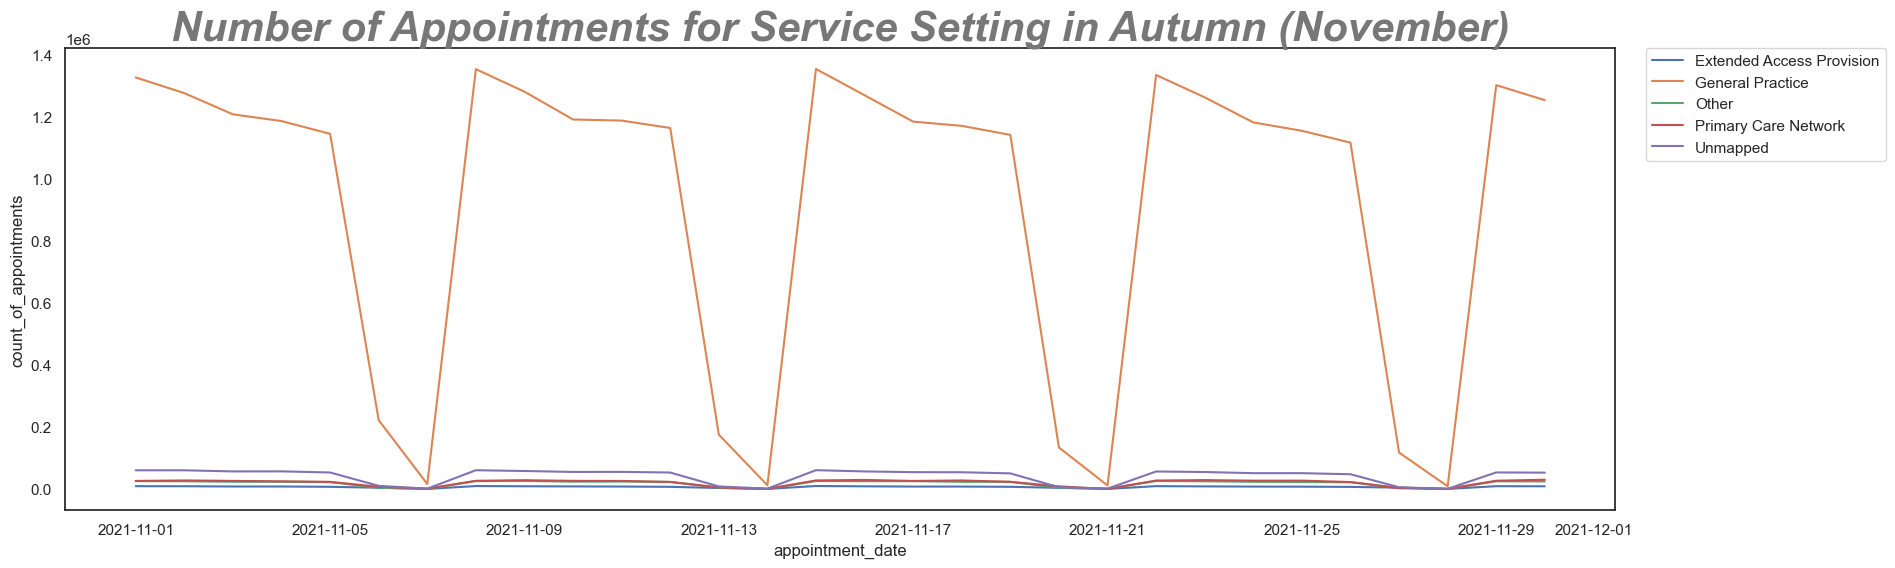

In [1435]:
#Creating a line plot
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data=nc_aut, ci=None)

plt.title("Number of Appointments for Service Setting in Autumn (November)", fontsize=30,fontweight='bold', fontstyle='oblique', color='#777777')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

#Save the chart as an image
plt.savefig('monthly_appointments5.png')

**Winter (December to February 2022):**

In [1147]:
# Look at December to February 2022 in more detail to allow a closer look.
nc_win = nc[nc['appointment_date'].between('2022-01-01','2022-1-31')]

nc_win = nc_win.groupby(['appointment_date', 'service_setting'])['count_of_appointments'].sum().reset_index()
nc_win


,appointment_date,service_setting,count_of_appointments
0,2022-01-01,Extended Access Provision,246
1,2022-01-01,General Practice,3578
2,2022-01-01,Other,280
3,2022-01-01,Primary Care Network,215
4,2022-01-01,Unmapped,572
...,...,...,...
150,2022-01-31,Extended Access Provision,9962
151,2022-01-31,General Practice,1305082
152,2022-01-31,Other,25034
153,2022-01-31,Primary Care Network,30509


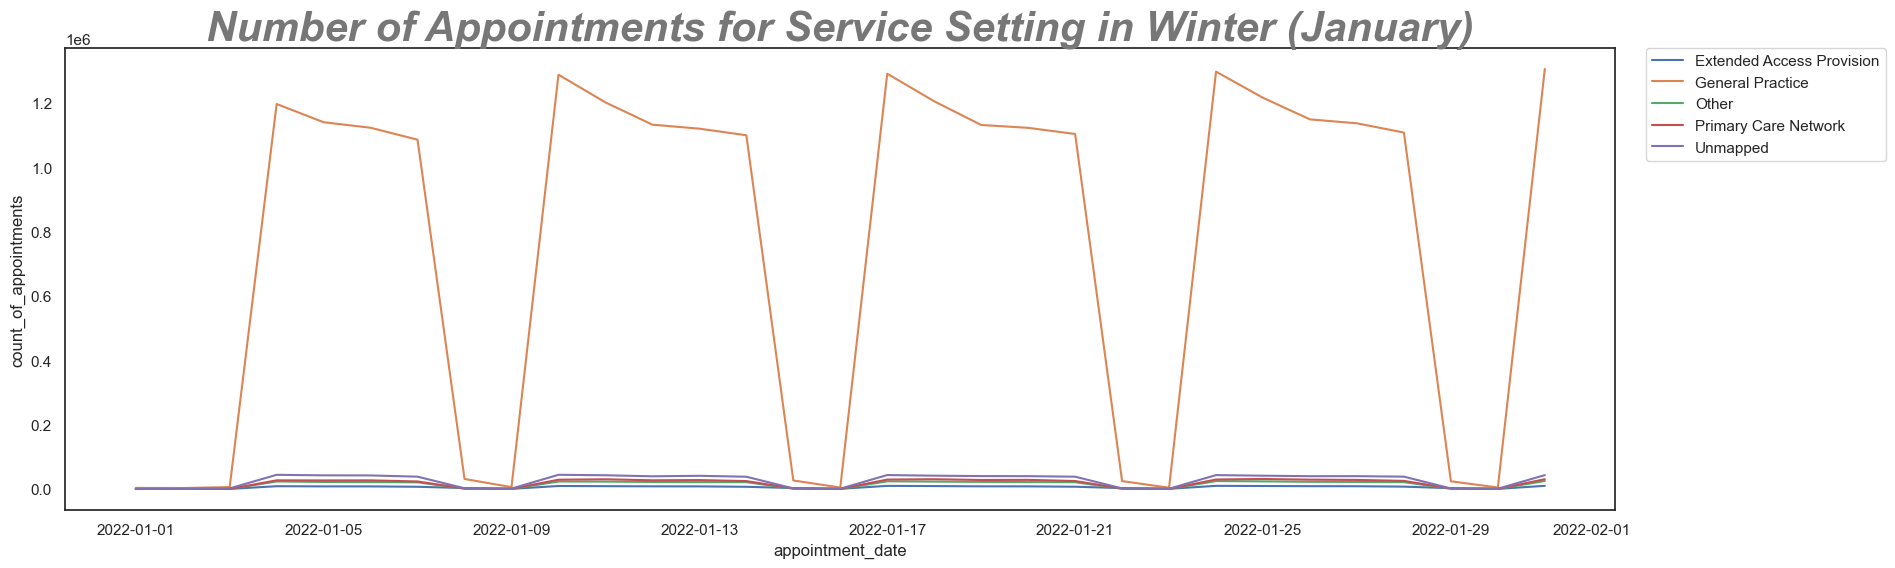

In [1437]:
# Create a lineplot.
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data=nc_win, ci=None)

plt.title("Number of Appointments for Service Setting in Winter (January)", fontsize=30,fontweight='bold', fontstyle='oblique', color='#777777')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

#Save the chart as an image
plt.savefig('monthly_appointments6.png')

**Spring (March to May 2022):**

In [1155]:
# Look at March to May 2022 in more detail to allow a closer look.
nc_spr = nc[nc['appointment_date'].between('2022-04-01','2022-04-30')]

nc_spr = nc_spr.groupby(['appointment_date', 'service_setting'])['count_of_appointments'].sum().reset_index()
nc_spr

,appointment_date,service_setting,count_of_appointments
0,2022-04-01,Extended Access Provision,8011
1,2022-04-01,General Practice,1085037
2,2022-04-01,Other,21077
3,2022-04-01,Primary Care Network,26493
4,2022-04-01,Unmapped,36836
...,...,...,...
145,2022-04-30,Extended Access Provision,3416
146,2022-04-30,General Practice,23675
147,2022-04-30,Other,1148
148,2022-04-30,Primary Care Network,3150


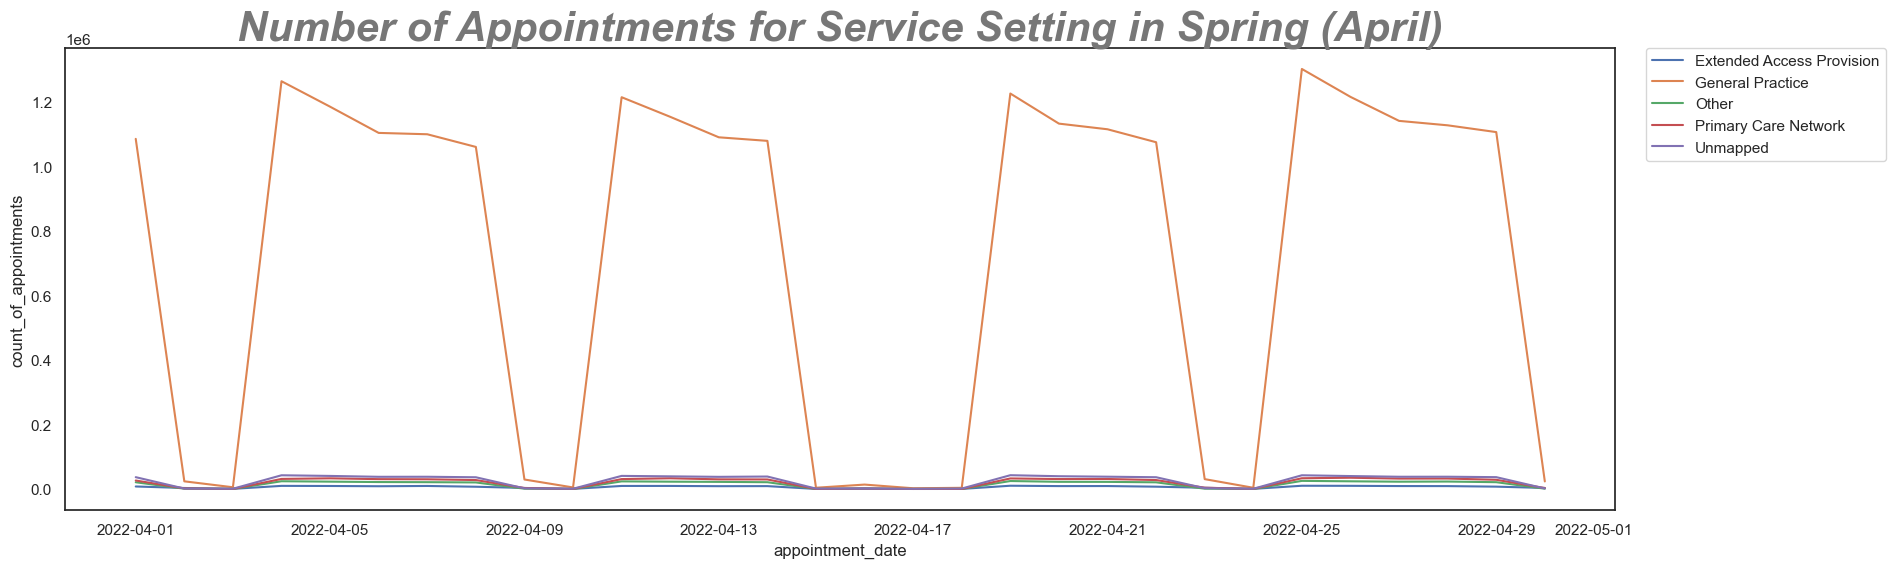

In [1439]:
# Create a lineplot.
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data=nc_spr, ci=None)

plt.title("Number of Appointments for Service Setting in Spring (April)", fontsize=30,fontweight='bold', fontstyle='oblique', color='#777777')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

#Save the chart as an image
plt.savefig('monthly_appointments7.png')

# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [1165]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [1161]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the first 5 rows of the DataFrame.
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [391]:
# Explore the metadata.
tweets.describe().round(1)

,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.0,1174.0
mean,1.567612e+18,8.6,0.4
std,2.427553e+13,29.8,2.0
min,1.567574e+18,0.0,0.0
25%,1.567590e+18,0.0,0.0
50%,1.567611e+18,1.0,0.0
75%,1.567633e+18,3.0,0.0
max,1.567655e+18,303.0,42.0


In [383]:
# Explore the dataset.
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [413]:
#counting the number of unique retweet counts
retweet_count = tweets['tweet_retweet_count'].value_counts()
print(retweet_count.head(10))
#counting the number of favourite tweet counts
favourite_count = tweets['tweet_favorite_count'].value_counts()
print(favourite_count.head(10))

tweet_retweet_count
0     526
1     215
2     114
3      70
5      35
4      27
7      18
12     16
8      15
73     14
Name: count, dtype: int64
tweet_favorite_count
0     1027
1       91
2       16
3       13
4        7
5        5
6        2
17       1
12       1
10       1
Name: count, dtype: int64


In [421]:
# Create a new DataFrame containing only the text.
tweets_text = tweets['tweet_full_text']

# View the DataFrame.
tweets_text.head(10)

0    As Arkansas’ first Comprehensive Stroke Certif...
1    RT @AndreaGrammer: Work-life balance is at the...
2    RT @OntarioGreens: $10 billion can go a long w...
3    RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies...
4    ICYMI: Our recent blogs on Cybersecurity in Ac...
5    Nursing interventions can be independent, depe...
6    🚨#NEW:🚨 Insurance companies are figuring out t...
7    Now, more than ever, we need to focus on stren...
8    RT @AlikaMD: Our nat’l choices re: #healthcare...
9    You ready for $JCO @_JennyCo ❤️\n\n#Healthcare...
Name: tweet_full_text, dtype: object

In [427]:
tags = []
# Loop through the messages, and create a list of values containing the # symbol.
for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())

tags_series = pd.Series(tags).value_counts()


In [431]:
# Display the first 30 records.
tags_series.head(30)

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [483]:
# Convert the series to a DataFrame in preparation for visualisation.
tags_df = tags_series.to_frame().reset_index()

# Rename the columns.
tags_df = tags_df.rename(columns={'index': 'word', 0: 'count'})

# View the result.
print(tags_df.dtypes)
tags_df


word     object
count     int64
dtype: object


,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
...,...,...
1749,#evestudy,1
1750,#patientdata…,1
1751,#secure,1
1752,#sms,1


In [477]:
# Display records where the count is larger than 10.
ten_more_tags = tags_df[tags_df['count'] > 10].reset_index()

ten_more_tags

,index,word,count
0,0,#healthcare,716
1,1,#health,80
2,2,#medicine,41
3,3,#ai,40
4,4,#job,38
5,5,#medical,35
6,6,#strategy,30
7,7,#pharmaceutical,28
8,8,#digitalhealth,25
9,9,#pharma,25


In [473]:
# Cleaning the data to eliminate overrepresented hashtags

In [485]:
values_to_drop = [5, 9, 22, 29, 31, 32, 38, 41, 42, 45]

top_ten_filtered = top_ten_tags.drop(values_to_drop)

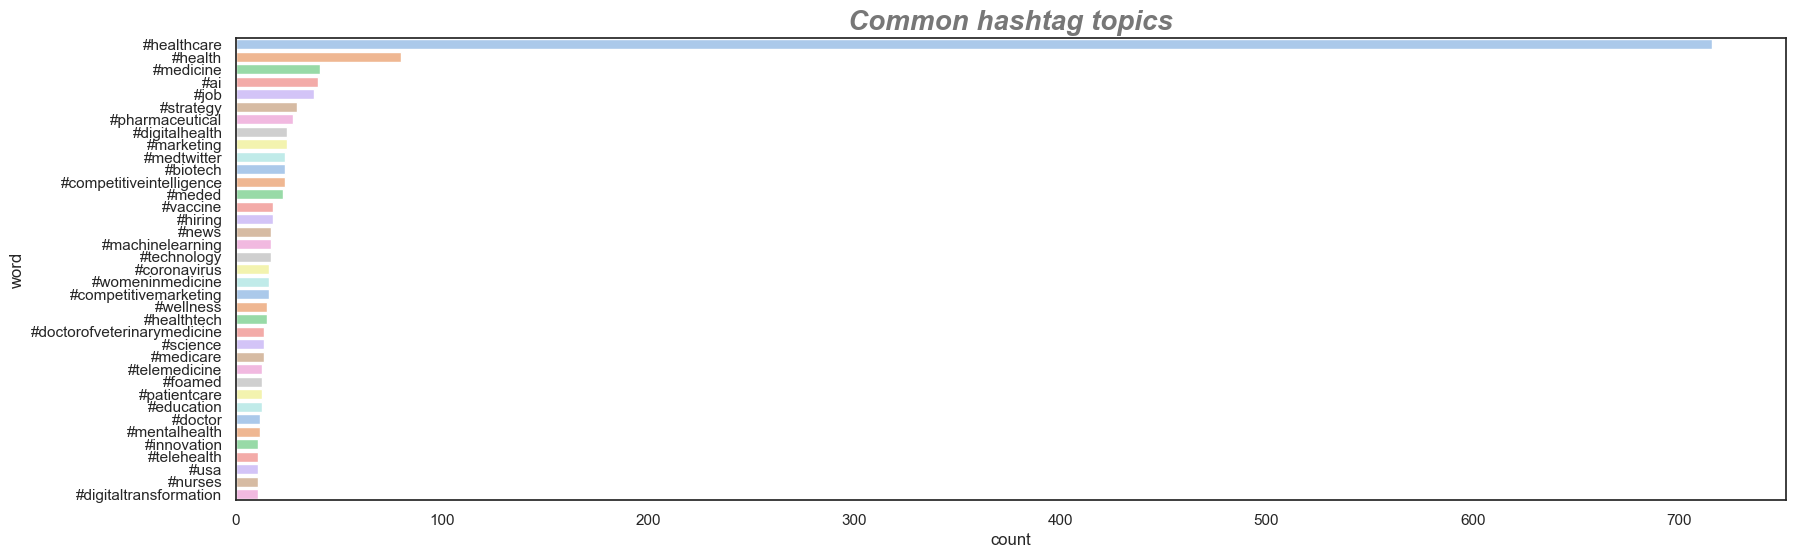

<Figure size 2000x1000 with 0 Axes>

In [1525]:
# Create a Seaborn barplot indicating records with a count >10 records.
sns.barplot(y="word", x="count", estimator=sum, data=top_ten_filtered, palette="pastel")
plt.title("Common hashtag topics", fontsize=20,fontweight='bold', fontstyle='oblique', color='#777777')

plt.figure(figsize=(20, 10))
#Save the chart as an image
plt.savefig('Hashtags.png')

# Assignment activity 6

### Make recommendations to the NHS. 

In [511]:
# Prepare your workstation.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# Load the appointments_regional.csv file.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [513]:
# Sense check the data
print(ar.dtypes)
print(ar.shape)

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object
(596821, 7)


In [527]:
# Print the min and max dates.
min_ar = ar['appointment_month'].min()
print('Min date is:', min_ar)

max_ar = ar['appointment_month'].max()
print('Max date is:', max_ar)

Min date is: 2020-01
Max date is: 2022-06


In [549]:
# Filter the data set to only look at data from 2021-08 onwards.
ar_filter = ar[ar['appointment_month'] >= '2021-08']
ar_filter

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,4961
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [555]:
# Create an aggregated data set to review the different features.

ar_agg = ar_filter.groupby(['appointment_month', 'appointment_status','hcp_type', 
                     'appointment_mode', 'time_between_book_and_appointment']) \
         ['count_of_appointments'].sum().reset_index()
# View the DataFrame.
ar_agg

,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2021-08,Attended,GP,Face-to-Face,1 Day,507835
1,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,194726
2,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,959486
3,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,102111
4,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,398772
...,...,...,...,...,...,...
3749,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,5494
3750,2022-06,Unknown,Unknown,Unknown,More than 28 Days,5115
3751,2022-06,Unknown,Unknown,Unknown,Same Day,1914
3752,2022-06,Unknown,Unknown,Unknown,Unknown / Data Quality,53


In [1291]:
# Create a new DataFrame
ar_df = ar_agg.groupby('appointment_month')['count_of_appointments'].sum().reset_index()


# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
ar_df['utilisation'] = ar_df['count_of_appointments'] / 30
# The NHS can accommodate a maximum of 1,200,000 appointments per day.
# Round the value to one decimal place

ar_df['utilisation'] = ar_df['utilisation'].round(1)


# View the DataFrame.
ar_df.head(10)

,appointment_month,count_of_appointments,utilisation
0,2021-08,23852171,795072.4
1,2021-09,28522501,950750.0
2,2021-10,30303834,1010127.8
3,2021-11,30405070,1013502.3
4,2021-12,25140776,838025.9
5,2022-01,25635474,854515.8
6,2022-02,25355260,845175.3
7,2022-03,29595038,986501.3
8,2022-04,23913060,797102.0
9,2022-05,27495508,916516.9


In [1281]:
# Sense check the data
ar_df.dtypes

appointment_month         object
count_of_appointments      int64
utilisation              float64
dtype: object

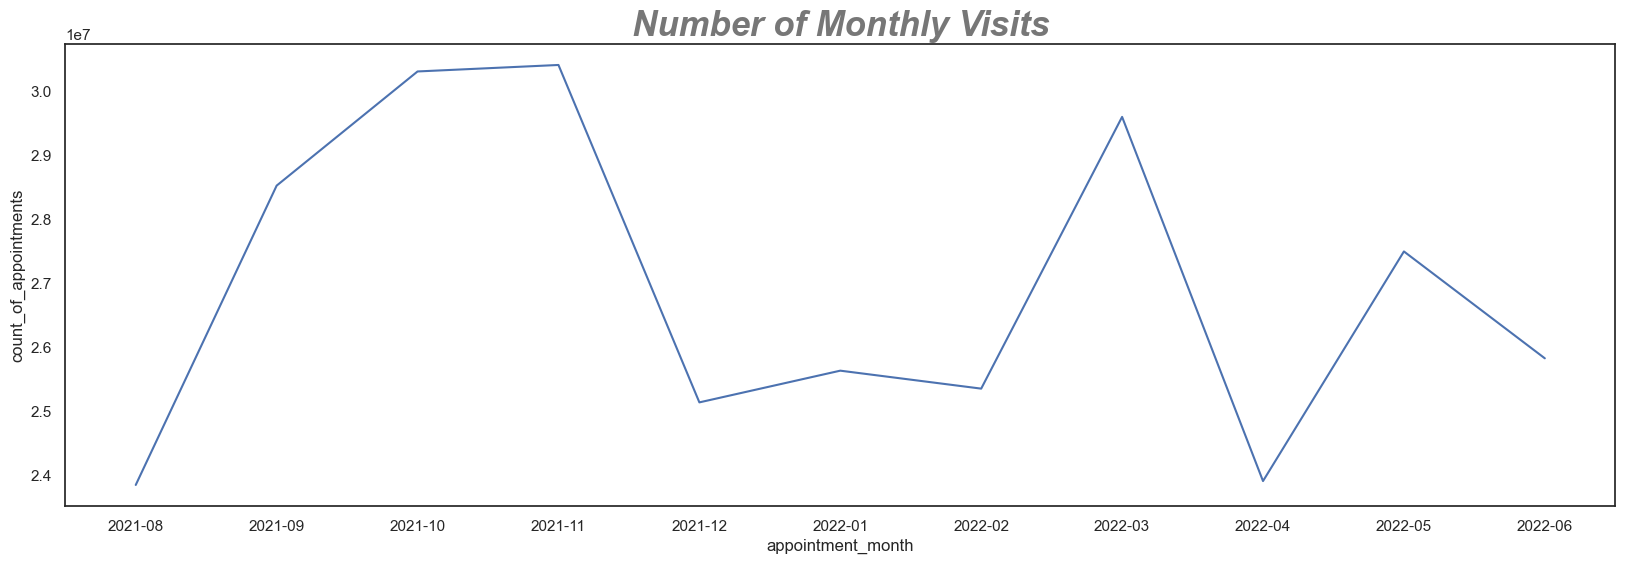

In [1443]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.
ar_df['appointment_month'] = ar_df['appointment_month'].astype(str)

# Create a lineplot with Seaborn.
sns.set_style('white')
sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_df)
plt.title('Number of Monthly Visits', fontsize=25, fontweight='bold', fontstyle='oblique', color='#777777')

#Save the chart as an image
plt.savefig('monthly_visits.png')

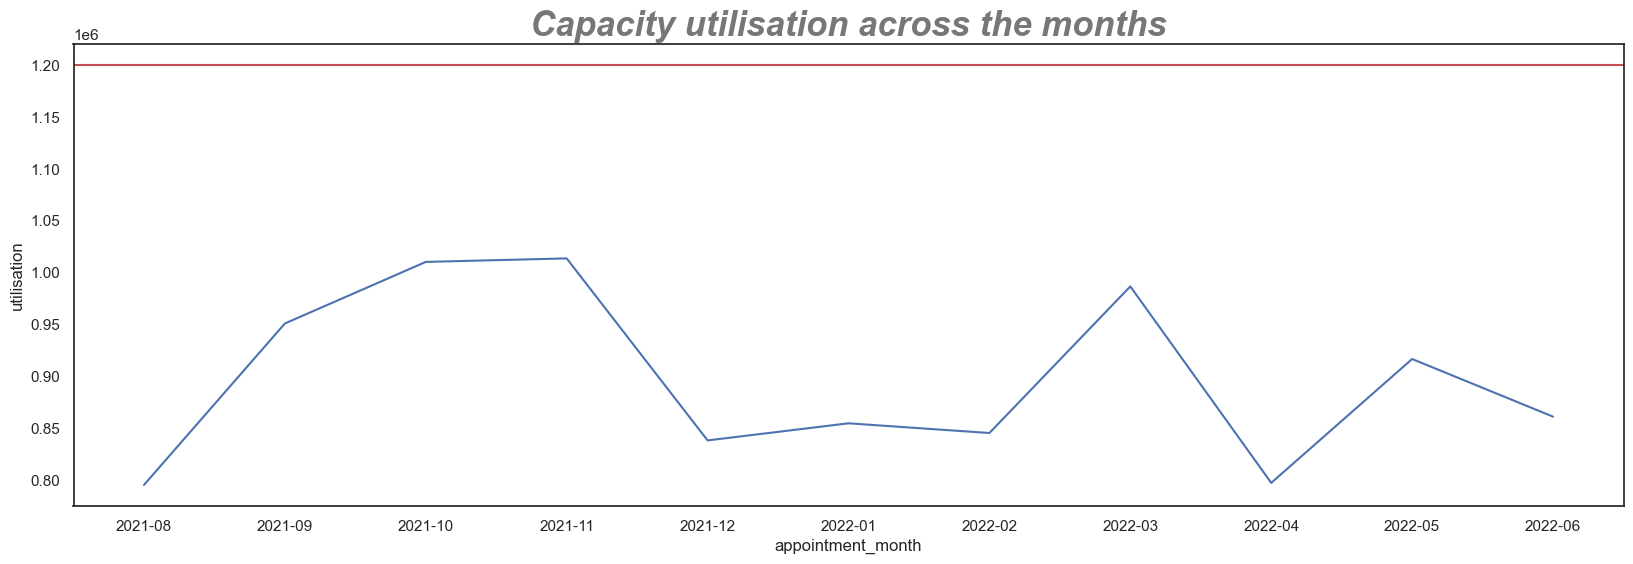

In [1445]:
# Plot monthly capacity utilisation.
sns.lineplot(x="appointment_month", y="utilisation", data=ar_df)

plt.title('Capacity utilisation across the months', fontsize=25, fontweight='bold', fontstyle='oblique', color='#777777')

# Show the 1,200,000 appointments limit
plt.axhline(y=1200000, color='r', linestyle='-')

#Save the chart as an image
plt.savefig('utilisation.png')

**Question 2:** How do the healthcare professional types differ over time?

In [1319]:
# Create a line plot to answer the question.
#Count per each HCP type
ar_agg['hcp_type'].value_counts()

hcp_type
GP                      1309
Other Practice staff    1303
Unknown                 1142
Name: count, dtype: int64

In [689]:
# Check how many appointments for each HCP type.
ar_hcp = ar_agg.groupby('hcp_type')['count_of_appointments'].sum()
ar_hcp


hcp_type
GP                      148371442
Other Practice staff    137982773
Unknown                   9692555
Name: count_of_appointments, dtype: int64

In [1327]:
# Filter out 'Unknown' from the df
df_hcp = ar_agg[ar_agg['hcp_type']!='Unknown'] 

# Group the Dataframe by month and hcp_type.
df_hcp = df_hcp.groupby(['appointment_month', 'hcp_type'])['count_of_appointments'].sum().reset_index()

df_hcp

,appointment_month,hcp_type,count_of_appointments
0,2021-08,GP,12299022
1,2021-08,Other Practice staff,10797821
2,2021-09,GP,14487785
3,2021-09,Other Practice staff,13126731
4,2021-10,GP,14300751
5,2021-10,Other Practice staff,14942504
6,2021-11,GP,14897749
7,2021-11,Other Practice staff,14432800
8,2021-12,GP,12654767
9,2021-12,Other Practice staff,11614470


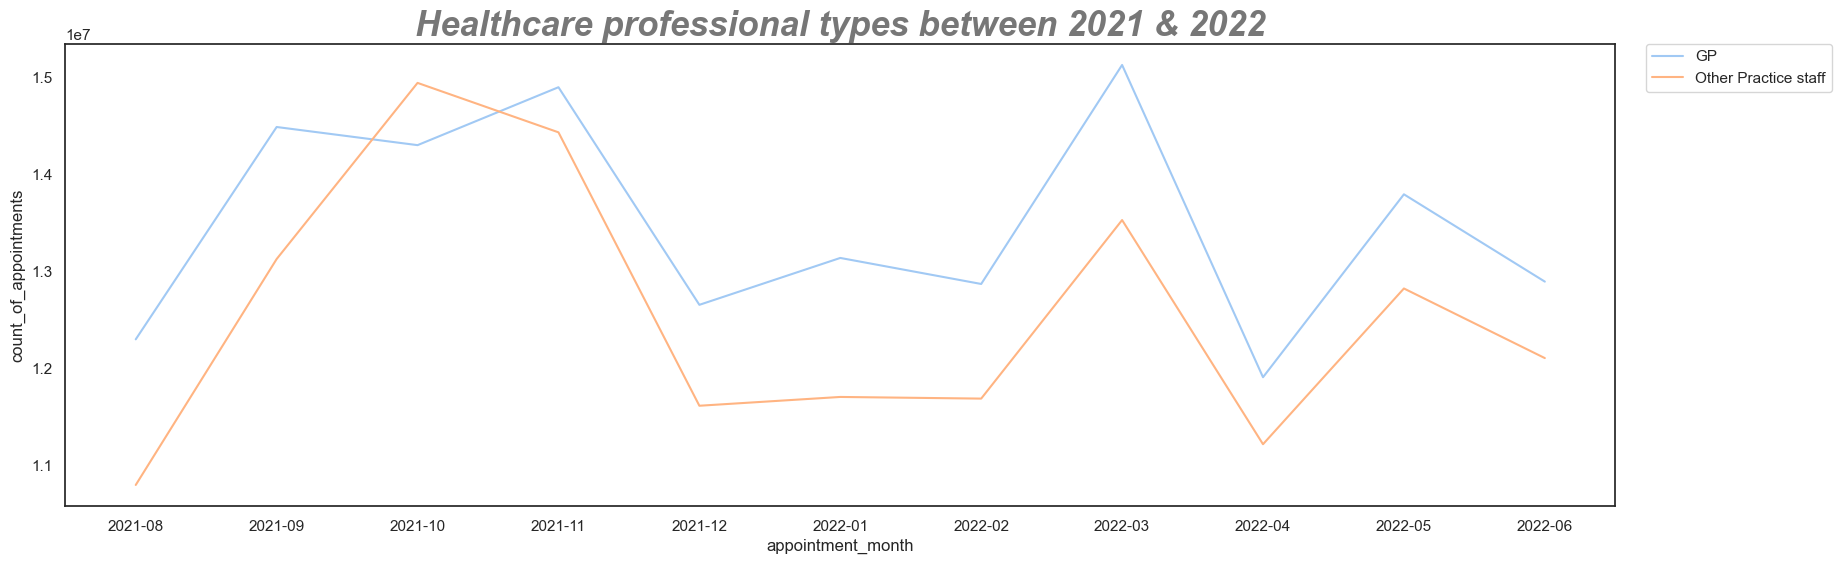

In [1529]:
# Create a line plot
sns.lineplot(x="appointment_month", y="count_of_appointments", hue="hcp_type", data=df_hcp, palette="pastel")

plt.title('Healthcare professional types between 2021 & 2022', fontsize=25, fontweight='bold', fontstyle='oblique', color='#777777');
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

#Save the chart as an image
plt.savefig('health_types.png')

**Question 3:** Are there significant changes in whether or not visits are attended?

In [1353]:
# Create a line plot to answer the question.
# Count of unique apointment statuses
ar_agg['appointment_status'].value_counts()

appointment_status
Attended    1285
Unknown     1249
DNA         1220
Name: count, dtype: int64

In [1355]:
# Check how many appointments for each appointment_status.
arr_status = ar_agg.groupby('appointment_status')['count_of_appointments'].sum()
arr_status

appointment_status
Attended    270657694
DNA          13318384
Unknown      12070692
Name: count_of_appointments, dtype: int64

In [1349]:
# Group the Dataframe by month and appointment_status.
df_att = ar_agg.groupby(['appointment_month', 'appointment_status'])['count_of_appointments'].sum().reset_index()

# Filter out Unkonown status
df_att = df_att[df_att['appointment_status'] != 'Unknown']

df_att

,appointment_month,appointment_status,count_of_appointments
0,2021-08,Attended,22081765
1,2021-08,DNA,949137
3,2021-09,Attended,25757066
4,2021-09,DNA,1321348
6,2021-10,Attended,27170506
7,2021-10,DNA,1565624
9,2021-11,Attended,27667665
10,2021-11,DNA,1428087
12,2021-12,Attended,22853483
13,2021-12,DNA,1198866


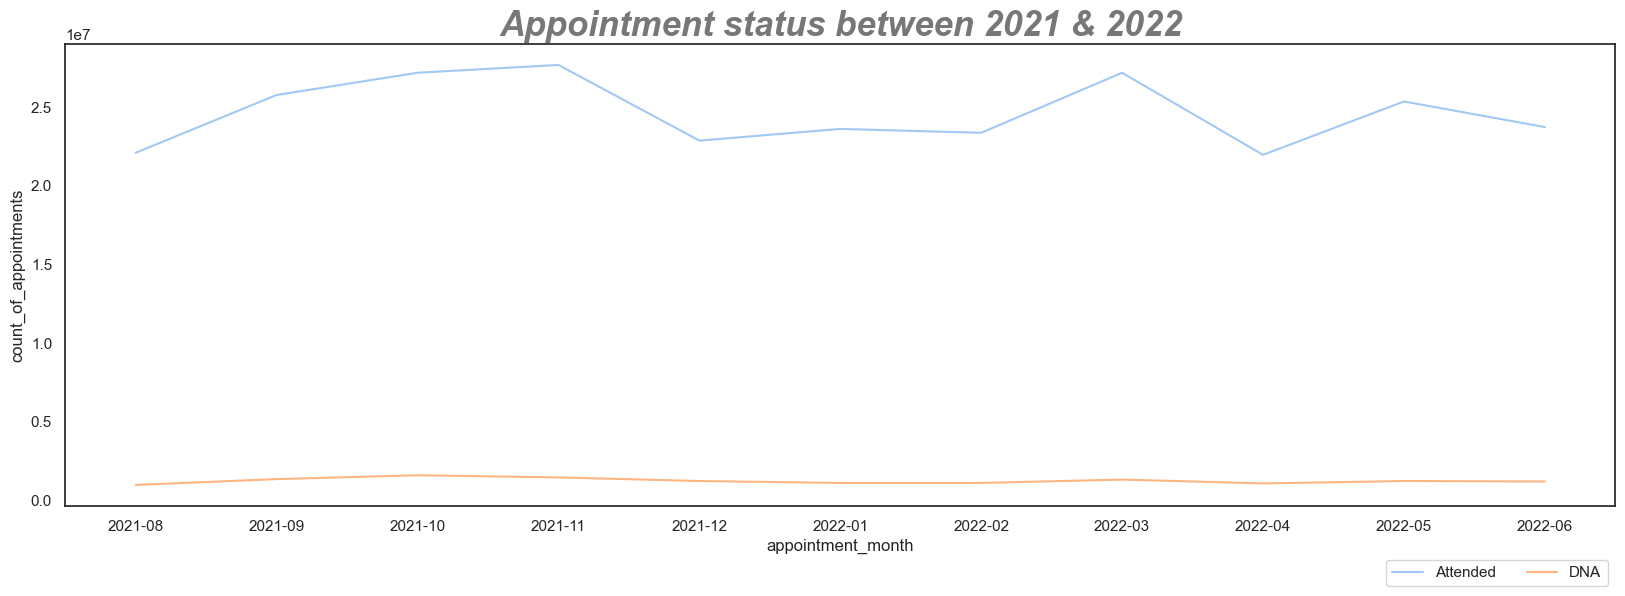

In [1534]:
# Create a line plot
sns.lineplot(x="appointment_month", y="count_of_appointments", hue="appointment_status", data=df_att, palette="pastel")

plt.title('Appointment status between 2021 & 2022', fontsize=25, fontweight='bold', fontstyle='oblique', color='#777777');
plt.legend(bbox_to_anchor=(1.0, -0.10), ncol=3);

#Save the chart as an image
plt.savefig('app_status.png')

**Question 4:** Are there changes in terms of appointment type and the busiest months?

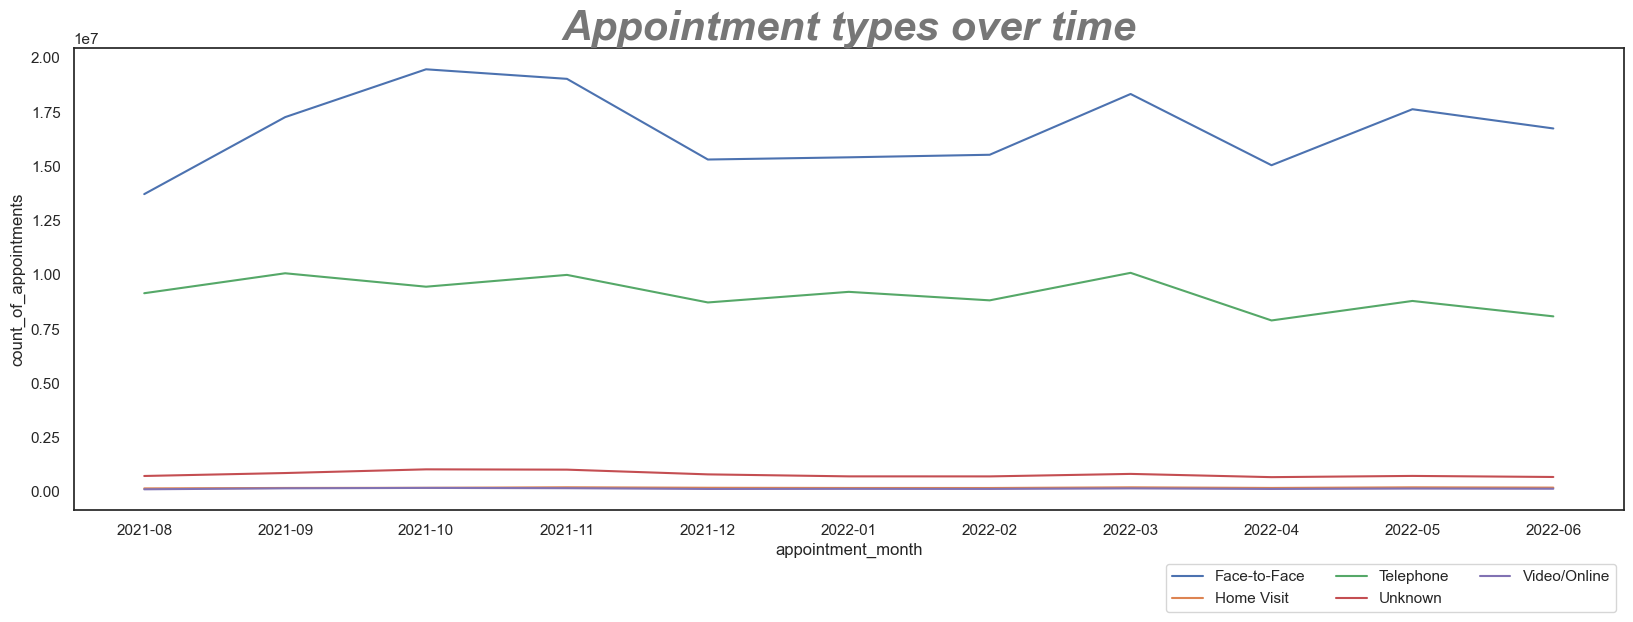

In [1467]:
# Create a line plot to answer the question.
df_am = ar_agg.groupby(['appointment_month', 'appointment_mode'])['count_of_appointments'].sum().reset_index()

sns.lineplot(x="appointment_month", y="count_of_appointments", hue="appointment_mode", data=df_am)

plt.title('Appointment types over time', fontsize=30, fontweight='bold', fontstyle='italic', color='#777777')

plt.legend(bbox_to_anchor=(1.0, -0.10), ncol=3);

#Save the chart as an image
plt.savefig('image13.png')

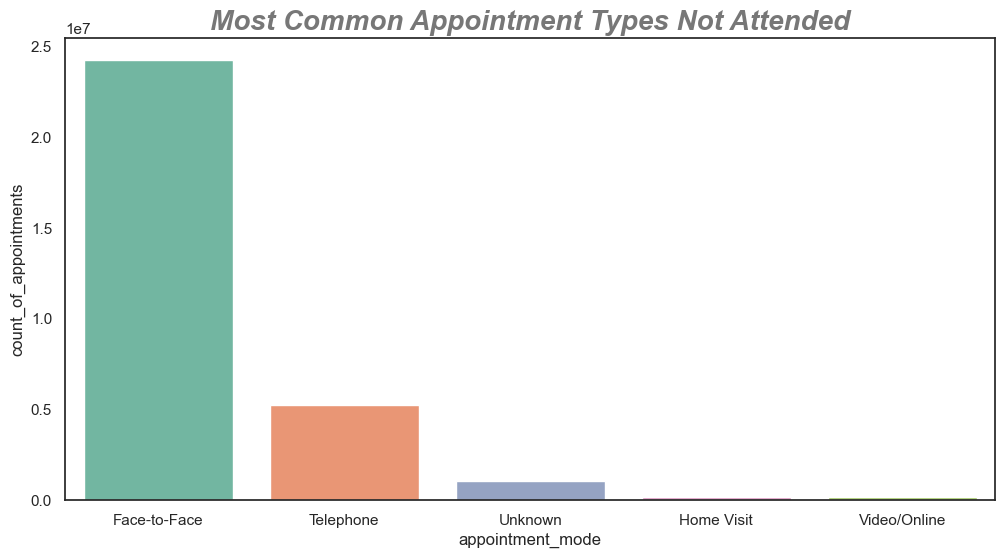

In [1543]:
# Filter for appointments that were not attended 
dna = ar[ar['appointment_status'] =='DNA']

# Group by appointment mode and sum the counts
mode_counts = dna.groupby('appointment_mode')['count_of_appointments'].sum().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=mode_counts, x='appointment_mode', y='count_of_appointments', palette='Set2')

plt.title("Most Common Appointment Types Not Attended", fontsize=20, fontweight='bold', fontstyle='italic', color='#777777')
plt.savefig('dna_modes.png')

**Question 5:** Are there any trends in time between booking and appointment?

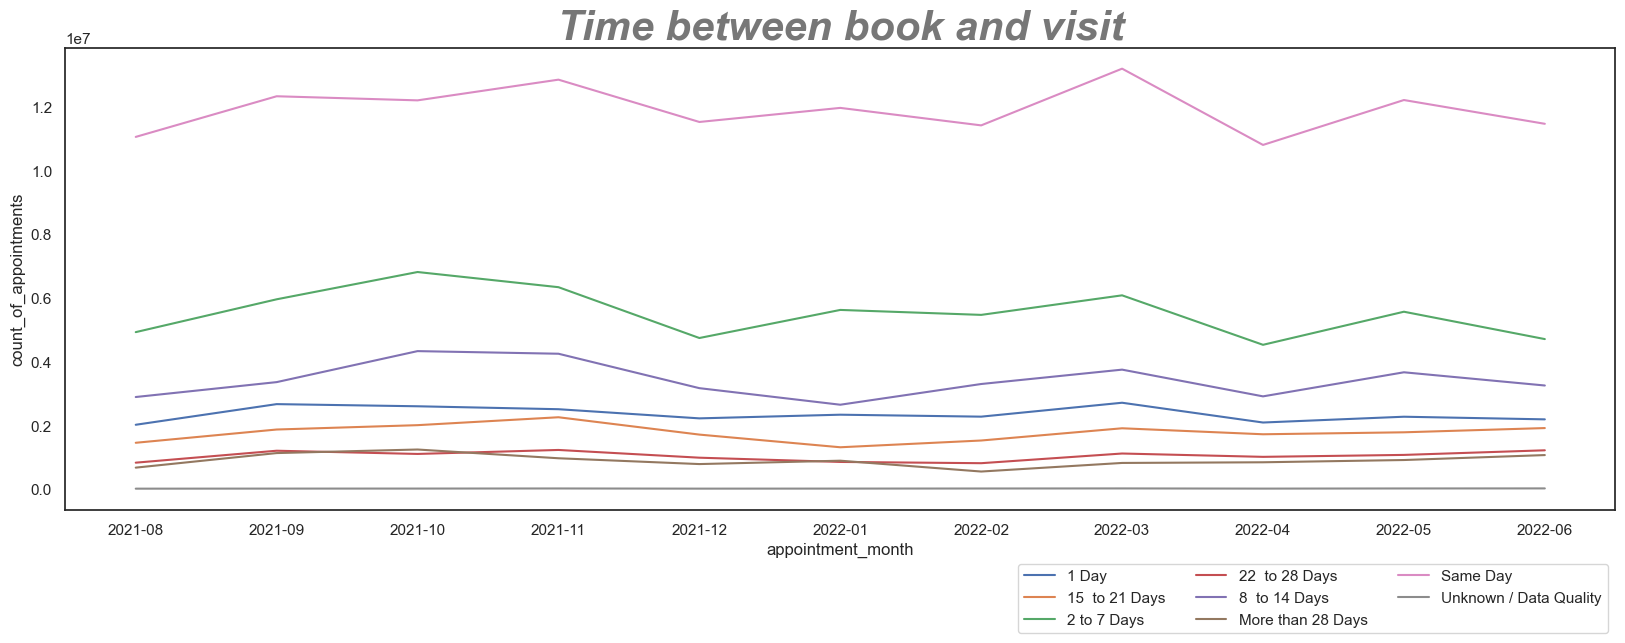

In [1469]:
# Create a line plot to answer the question.
df_tb = ar_agg.groupby(['appointment_month', 'time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index()

sns.lineplot(x="appointment_month", y="count_of_appointments", hue="time_between_book_and_appointment", data=df_tb)
plt.title('Time between book and visit', fontsize=30, fontweight='bold', fontstyle='italic', color='#777777')

plt.legend(bbox_to_anchor=(1.0, -0.10), ncol=3);

#Save the chart as an image
plt.savefig('time_book_visit.png')

**Question 6:** How do the various service settings compare?

In [723]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
nc

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


In [735]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.
nc_2 = nc.groupby(['appointment_month','service_setting'])['count_of_appointments'].sum().reset_index()
# View the DataFrame.
nc2

,count_of_appointments,appointment_month
0,3,2021-08
1,7,2021-08
2,79,2021-08
3,725,2021-08
4,2,2021-08
...,...,...
817389,12,2022-06
817390,4,2022-06
817391,92,2022-06
817392,4,2022-06


Text(0.5, 1.0, 'Spread for Service Setting Appointments')

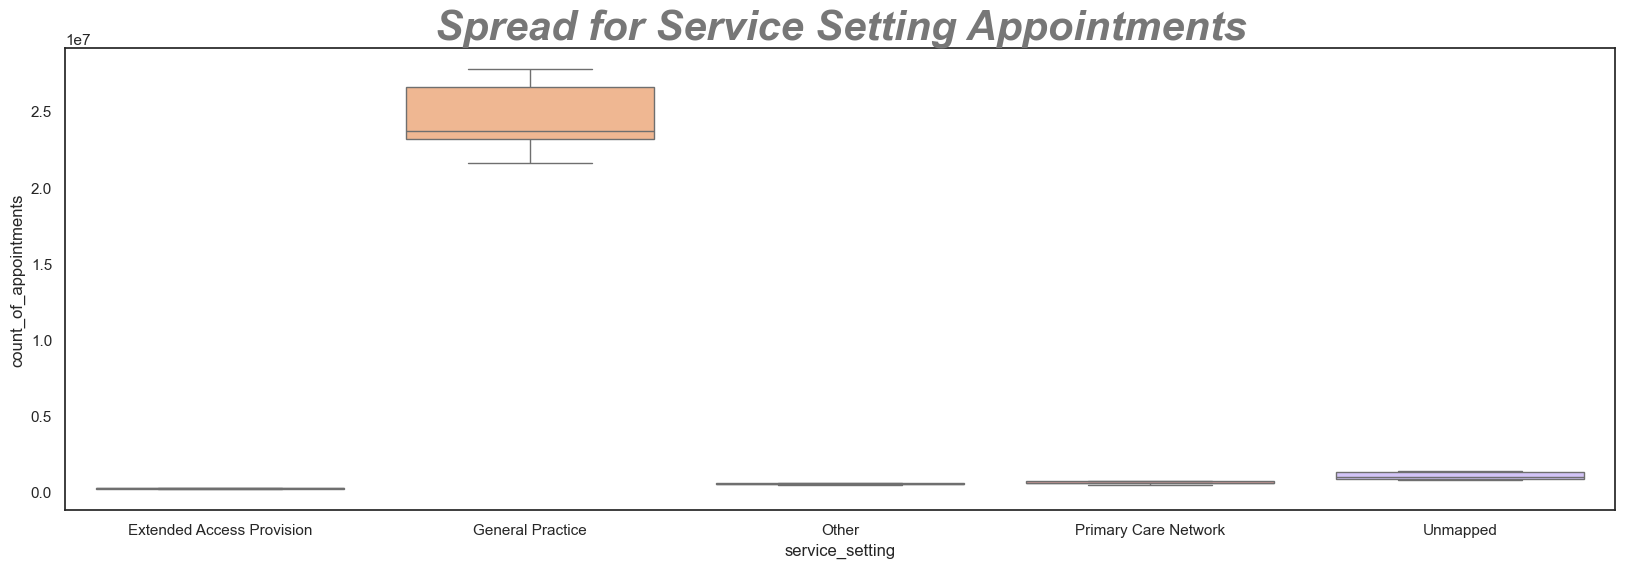

In [1455]:
# Create a boxplot in Seaborn based on the new DataFrame to indicate the service settings for the number of appointments.
sns.boxplot(x='service_setting', y='count_of_appointments', data=nc_2, palette="pastel")
plt.title('Spread for Service Setting Appointments', fontsize=30, fontweight='bold', fontstyle='oblique', color='#777777')


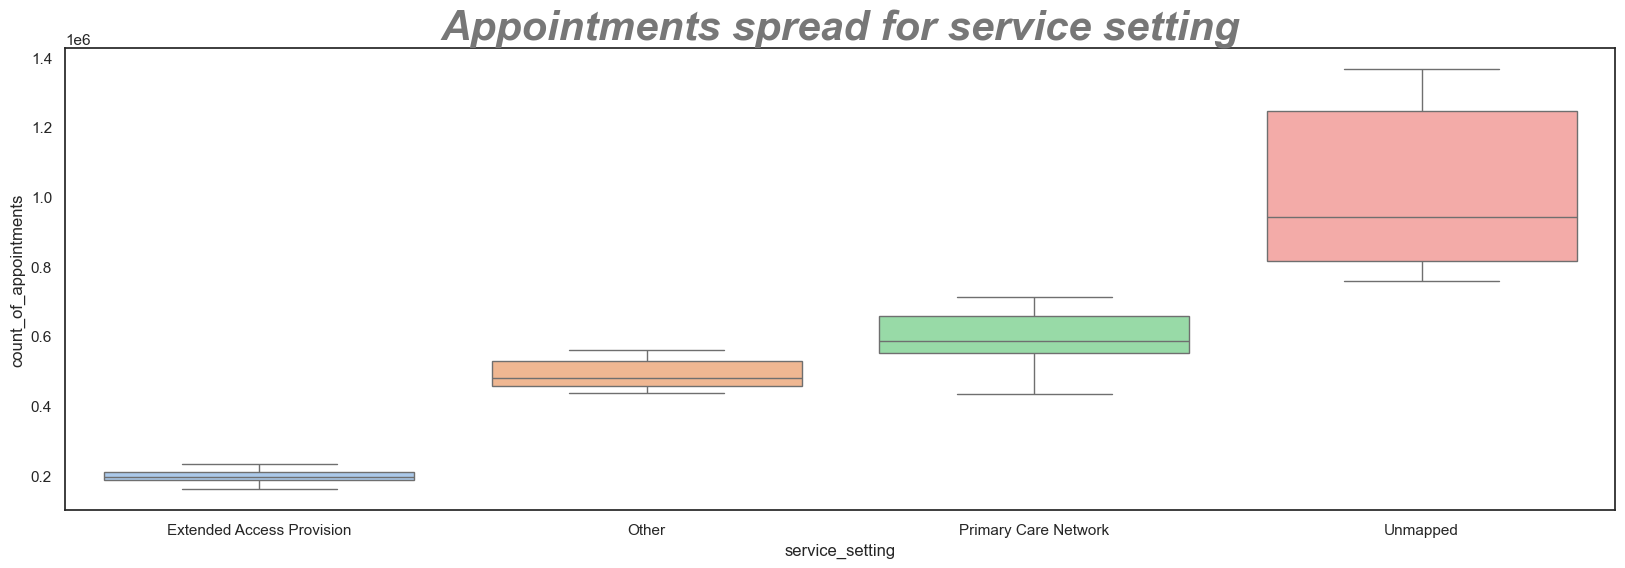

In [1457]:
# Create a boxplot in Seaborn where you concentrate on all the service settings, excluding GP visits.
sns.boxplot(x='service_setting', y='count_of_appointments', data=nc_2[nc_2['service_setting']!='General Practice'], palette="pastel")

plt.title('Appointments spread for service setting', fontsize=30, fontweight='bold', fontstyle='oblique', color='#777777');

#Save the chart as an image
plt.savefig('app_spread.png')

### Provide a summary of your findings and recommendations based on the analysis.

Key Conclusions:
- November is the busiest month in terms of scheduled appointments
- Appointments were scheduled betwen 2021-12-01 & 2022-06-30
- Technology, AI and Machine Learning hashtags in Twitter getting traction which can be explored by the NHS
- Current resources are sufficient from utilisation perspective, however, it is crucial to to come up wth better and creative ideas to utilise existing resources more effectively
- Among missed appointments, face-to-face sessions are the most common mode of missed sessions
- Most appointments are normally attended on the same day of the booking